In [73]:
import numpy as np
import pandas as pd
import string

In [74]:
data = pd.read_csv('../nlp-getting-started/train.csv',sep=',')
#df = data[['Phrase','Sentiment']]
df = data
print(df.head(10))

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
5   8     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...   
6  10     NaN      NaN  #flood #disaster Heavy rain causes flash flood...   
7  13     NaN      NaN  I'm on top of the hill and I can see a fire in...   
8  14     NaN      NaN  There's an emergency evacuation happening now ...   
9  15     NaN      NaN  I'm afraid that the tornado is coming to our a...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1  


<AxesSubplot:xlabel='target'>

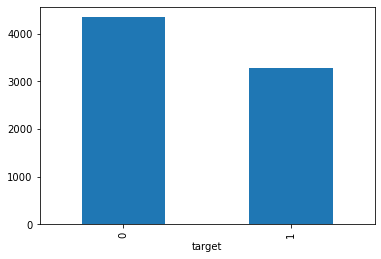

In [3]:
df.groupby(['target']).size().plot.bar()

In [77]:
def preprocess(df):
    delete_gar = lambda sentence: ' '.join([w for w in sentence.split() if w[0] != "#" and "http://"not in w and w !="-" and w[0]!='@'])
    df['text'] = df['text'].apply(delete_gar)
    return df
                                           

In [78]:
df2 = preprocess(df)

In [79]:
df2[df2['text'].duplicated()==True]

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out:,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | | |,0
114,164,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | | |,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | | |,0
116,168,aftershock,NaN,320 [IR] ICEMOON [AFTERSHOCK] | | |,0
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,The out of control wild fires in California ev...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [80]:
df2_text = df2['text'].to_list()
df2_id = df2['id'].to_list()
df_target = df2['target'].to_list()

result = []
for d in set(df2_text):
    res = []
    cnt = 0
    for i in range(len(df2_text)):
        if df2_text[i] == d:
            cnt += 1
            res.append(df2_id[i])
            res.append(df_target[i])
    if cnt > 1:
        for i in range(1,len(res),2):
            if i == 1:
                da = res[i]
            else:
                if da != res[i]:
                    result.append(res)
                    break
result

[[1676, 1, 1707, 0],
 [9779, 0, 9783, 1, 9790, 0],
 [5996, 1, 6023, 1, 6031, 0],
 [7816, 1, 7837, 0],
 [2379, 0, 2385, 0, 2400, 1],
 [8018, 1, 8044, 0],
 [10110, 0, 10124, 0, 10156, 1],
 [3403, 0, 3406, 0, 3414, 1, 3421, 0, 3425, 0, 3445, 0],
 [1402, 0, 1409, 1, 1420, 0],
 [3582, 1, 3589, 0],
 [5564, 1, 5565, 0, 5577, 0, 5595, 0, 5598, 0, 5599, 0, 5603, 0],
 [6336,
  1,
  6337,
  1,
  6339,
  1,
  6344,
  1,
  6345,
  1,
  6365,
  1,
  6366,
  0,
  6380,
  1,
  6382,
  1],
 [4058, 0, 4080, 1, 4092, 0],
 [4068, 1, 4072, 1, 4076, 0, 4077, 1],
 [6138, 1, 6174, 0],
 [5997, 0, 6032, 1],
 [796, 1, 822, 0],
 [4918, 1, 4922, 0, 4935, 0],
 [8698, 1, 8702, 0, 8714, 0, 8739, 1],
 [7799,
  0,
  7800,
  0,
  7804,
  1,
  7815,
  0,
  7822,
  0,
  7833,
  0,
  7835,
  0,
  7842,
  0,
  7844,
  1],
 [6087, 0, 6090, 0, 6097, 1, 6111, 0, 6118, 0, 6132, 1],
 [7602,
  1,
  7609,
  0,
  7612,
  0,
  7613,
  1,
  7622,
  0,
  7626,
  0,
  7630,
  0,
  7633,
  0,
  7635,
  0],
 [1723, 1, 1922, 0],
 [7362, 1

In [84]:
df[df['id'] == 6112]['target'] = 1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24772\3437478594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['id'] == 6112]['target'] = 1
